# K NEAREST NEIGHBORS

kNN  IS A TYPE OF SUPERVISED ML algorithm which can be used for both regression and classification porpose
    KNN popularily we use it for classification 
    LInear regression used for only regression
    LOgistic reg used for classification
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.    
    
        Lets understand with an illustration
     1 given a training dataset,we have a new test data that we need to assign to one of the classes
     2 now, the knn algorithm calculates the distance b/w the test and the given training data 
     3 after calculating the distance, it will select the k training pts which are nearest to the test data .lets assume the value of k=3 for our example
     4 now,3 nearest neighbours are selected as shown in the fig,lets see in which class our test data will be assigned
     no of green class values=2      probability(green)=2/3
     no of red class value=1         probability(red)=1/3
     
     
     
 EUCLIDEAN DISTANCE:
 
     it is most commonly used to calculate b/w 2 pts
     Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:
K-Nearest Neighbor(KNN) Algorithm for Machine Learning
By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image:
K-Nearest Neighbor(KNN) Algorithm for Machine Learning
As we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.


Advantages of KNN Algorithm:
It is simple to implement.
It is robust to the noisy training data
It can be more effective if the training data is large.

Disadvantages of KNN Algorithm:
Always needs to determine the value of K which may be complex some time.
The computation cost is high because of calculating the distance between the data points for all the training samples.
     

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.shape

(569, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [11]:
df=df.drop(['Unnamed: 32'],axis=1)

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

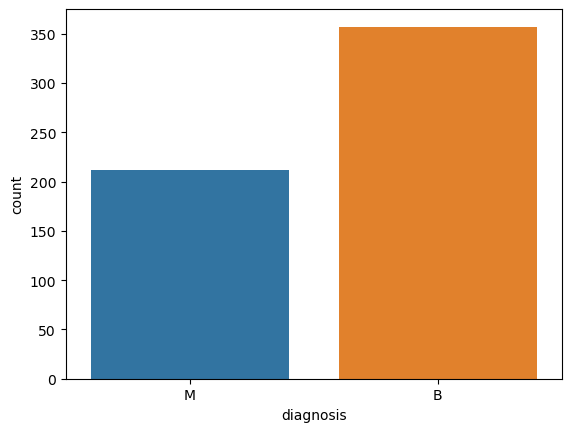

In [15]:
#plot each class frequency
sns.countplot(x='diagnosis',data=df)
plt.show()

# using KBest selection method

select KBest use f_classif function to find best features where f_classif uses ANOVA test


In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
#replace label column(diagnosis) into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [20]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis


In [21]:
best_features=SelectKBest(score_func=f_classif,k=17)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [22]:
#concatenate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']#name output columns
print(feature_scores.nlargest(17,'score'))#print 17 best features

            Feature_Name       score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


# MODEL BUILDING

In [23]:
new_x=df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean',
          'concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]
new_x

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [24]:
new_x.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104,0.088799,0.272188,0.104341,0.254265,0.405172,2.866059,40.337079,25.677223,0.132369
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129,0.079720,0.208624,0.052813,0.157336,0.277313,2.021855,45.491006,6.146258,0.022832
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000,0.000000,0.019380,0.027290,0.111500,0.757000,6.802000,12.020000,0.071170
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000,0.029560,0.114500,0.064920,0.147200,0.232400,1.606000,17.850000,21.080000,0.116600
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000,0.061540,0.226700,0.092630,0.211900,0.324200,2.287000,24.530000,25.410000,0.131300
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000,0.130700,0.382900,0.130400,0.339100,0.478900,3.357000,45.190000,29.720000,0.146000
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,0.426800,1.252000,0.345400,1.058000,2.873000,21.980000,542.200000,49.540000,0.222600


In [25]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(new_x)

In [26]:
#building model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.5,random_state=355)

In [27]:
#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n------------------TRain Result------')
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")   #train prediction score
    elif train==False:
        pred=clf.predict(x_test)
        print('\n-----------Test REsult-------')
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")    #test prediction score
        print("\n--Test classification report   \n",classification_report(y_test,pred,digits=2))  #model confidence accuracy
        

In [28]:
#initate kneighbours classifier
knn=KNeighborsClassifier()

In [29]:
#model training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
#call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:97.54%

-----------Test REsult-------
accuracy score:96.14%

--Test classification report   
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       186
           1       0.96      0.93      0.94        99

    accuracy                           0.96       285
   macro avg       0.96      0.95      0.96       285
weighted avg       0.96      0.96      0.96       285



# cross validation
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set. The three steps involved in cross-validation are as follows :

    1 Reserve some portion of sample data-set.
     2    Using the rest data-set train the model.
      3  Test the model using the reserve portion of the data-set.
      
      
      Methods of Cross Validation

Validation In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.



 LOOCV (Leave One Out Cross Validation) In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point.
 
     An advantage of using this method is that we make use of all data points and hence it is low bias. 
     Drawback = of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.
     
     
     
   K-Fold Cross Validation In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.
   
   The diagram below shows an example of the training subsets and evaluation subsets generated in k-fold cross-validation. Here, we have total 25 instances. In first iteration we use the first 20 percent of data for evaluation, and the remaining 80 percent for training([1-5] testing and [5-25] training) while in the second iteration we use the second subset of 20 percent for evaluation, and the remaining three subsets of the data for training([5-10] testing and [1-5 and 10-25] training), and so on. 

    Advantages of Cross Validation:
    1 Overcoming Overfitting: Cross validation helps to prevent overfitting by providing a more robust estimate of the model’s performance on unseen data.
    2 Model Selection: Cross validation can be used to compare different models and select the one that performs the best on average.
    3 Hyperparameter tuning: Cross validation can be used to optimize the hyperparameters of a model, such as the regularization parameter, by selecting the values that result in the best performance on the validation set.
    4 Data Efficient: Cross validation allows the use of all the available data for both training and validation, making it a more data-efficient method compared to traditional validation techniques.
    
    
    
    Disadvantages of Cross Validation:
    1 Computationally Expensive: Cross validation can be computationally expensive, especially when the number of folds is large or when the model is complex and requires a long time to train.
    2 Time-Consuming: Cross validation can be time-consuming, especially when there are many hyperparameters to tune or when multiple models need to be compared.
    3 Bias-Variance Tradeoff: The choice of the number of folds in cross validation can impact the bias-variance tradeoff, i.e., too few folds may result in high variance, while too many folds may result in high bias.
 


# Kfold method for(demo purpose only)

In [31]:
from sklearn.model_selection import KFold,cross_val_score

In [32]:
k_f=KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [33]:
for train,test in k_f.split([12,23,35,46,57,63,75,86,96,108]):
    print('train:',train,'test:',test)

train: [4 5 6 7 8 9] test: [0 1 2 3]
train: [0 1 2 3 7 8 9] test: [4 5 6]
train: [0 1 2 3 4 5 6] test: [7 8 9]


# cross validation score to check if the model is overfitting

In [35]:
cross_val_score(knn,x_scalar,y,cv=5)

array([0.96491228, 0.96491228, 0.97368421, 0.98245614, 0.96460177])

In [36]:
cross_val_score(knn,x_scalar,y,cv=5).mean()

0.9701133364384411

# hyperparameter tuning
we can improvise the score

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. The two best strategies for Hyperparameter tuning are:

    GridSearchCV
    RandomizedSearchCV
    
In GridSearchCV 
    approach, the machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values. 
    
    For example, if we want to set two hyperparameters C and Alpha of the Logistic Regression Classifier model, with different sets of values. The grid search technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one. 

As in the image, for C = [0.1, 0.2, 0.3, 0.4, 0.5] and Alpha = [0.1, 0.2, 0.3, 0.4]. For a combination of C=0.3 and Alpha=0.2, the performance score comes out to be 0.726(Highest), therefore it is selected. 

Drawback: GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive. 


RandomizedSearchCV 
RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set of hyperparameters. This approach reduces unnecessary computation.

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid={'algorithm': ['kd_tree','brute'],
           'leaf_size':[3,5,6,7,8],
           'n_neighbors':[3,5,7,9,11,13]}

In [39]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [40]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [41]:
gridsearch.best_score_

0.9682330827067668

In [42]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [43]:
#we will use the best parameter in our k_nn algorithm and check if accuracy is increasing
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=3)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [45]:
# call the function and pass the dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(knn,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:98.59%

-----------Test REsult-------
accuracy score:96.14%

--Test classification report   
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       186
           1       0.95      0.94      0.94        99

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285



In [46]:
# if u want to check the confusion_matrix you can check
y_pred=knn.predict(x_test)
cfn=confusion_matrix(y_test,y_pred)
cfn

array([[181,   5],
       [  6,  93]], dtype=int64)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [5]:
df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['bengaluru','delhi','hyderabad','bengaluru','hyderabad','bengaluru'],
                'exp':[1,3,5,6,9,'none']})
df

,salary,city,exp
0,25000,bengaluru,1
1,48000,delhi,3
2,71000,hyderabad,5
3,85000,bengaluru,6
4,90000,hyderabad,9
5,55000,bengaluru,none


# encoder and imputers

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lab_enc=LabelEncoder()

In [8]:
df2=lab_enc.fit_transform(df['city'])
pd.Series(df2)

0    0
1    1
2    2
3    0
4    2
5    0
dtype: int32

In [9]:
df['city']=df2
df

,salary,city,exp
0,25000,0,1
1,48000,1,3
2,71000,2,5
3,85000,0,6
4,90000,2,9
5,55000,0,none


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [3]:
ohe= OneHotEncoder()
si=SimpleImputer()

In [4]:
import pandas as pd
df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['bengaluru','delhi','hyderabad','bengaluru','hyderabad','bengaluru'],
                 'gender':['male','female','female','female','male','male'],
                'exp':[1,3,5,6,9,'nan']})
df

,salary,city,gender,exp
0,25000,bengaluru,male,1
1,48000,delhi,female,3
2,71000,hyderabad,female,5
3,85000,bengaluru,female,6
4,90000,hyderabad,male,9
5,55000,bengaluru,male,nan


In [5]:
ct= make_column_transformer(
    (ohe,['city','gender']),
    (si,['exp']),remainder='passthrough'
   )        #'passthrough'to keep all other columns

In [6]:
encoded = pd.DataFrame(ct.fit_transform(df))
encoded

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,1.0,1.0,25000.0
1,0.0,1.0,0.0,1.0,0.0,3.0,48000.0
2,0.0,0.0,1.0,1.0,0.0,5.0,71000.0
3,1.0,0.0,0.0,1.0,0.0,6.0,85000.0
4,0.0,0.0,1.0,0.0,1.0,9.0,90000.0
5,1.0,0.0,0.0,0.0,1.0,4.8,55000.0


In [7]:
encoded = pd.DataFrame(ct.fit_transform(df),columns=['city_bengaluru','city_delhi','city_hyd','gender_female','gender_male',"exp",'salary'])
encoded

,city_bengaluru,city_delhi,city_hyd,gender_female,gender_male,exp,salary
0,1.0,0.0,0.0,0.0,1.0,1.0,25000.0
1,0.0,1.0,0.0,1.0,0.0,3.0,48000.0
2,0.0,0.0,1.0,1.0,0.0,5.0,71000.0
3,1.0,0.0,0.0,1.0,0.0,6.0,85000.0
4,0.0,0.0,1.0,0.0,1.0,9.0,90000.0
5,1.0,0.0,0.0,0.0,1.0,4.8,55000.0


In [8]:
df

,salary,city,gender,exp
0,25000,bengaluru,male,1
1,48000,delhi,female,3
2,71000,hyderabad,female,5
3,85000,bengaluru,female,6
4,90000,hyderabad,male,9
5,55000,bengaluru,male,nan


# get_dummies

    1 one hot encoding and get_dummies almost equal. Major difference is if u want to reduce (drop_first=True)the column size of the dataset u can use get_dummies
    2 OHC does not add variable name to ur dataframe, but get_dummies add variable names
    3 sometimes having more column might overfit the model

In [9]:
df1=pd.get_dummies(df[['city','gender']])
df1

,city_bengaluru,city_delhi,city_hyderabad,gender_female,gender_male
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1
5,1,0,0,0,1


In [10]:
df1=pd.get_dummies(df[['city','gender']],drop_first=True)
df1

,city_delhi,city_hyderabad,gender_male
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,0
4,0,1,1
5,0,0,1


# ordinal encoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
import pandas as pd
employee= pd.DataFrame({'position':['SE','Manager','Team Lead','SSE'],
                      'project':['A','B','C','D'],
                       'salary':[25000,85000,71000,48000]})
employee

,position,project,salary
0,SE,A,25000
1,Manager,B,85000
2,Team Lead,C,71000
3,SSE,D,48000


In [13]:
ord_enc=OrdinalEncoder(categories=[['SE',"SSE",'Team Lead','Manager'],['A','B','C','D']])
encoded_df=ord_enc.fit_transform(employee[['position','project']])
encoded_df

array([[0., 0.],
       [3., 1.],
       [2., 2.],
       [1., 3.]])

# Binary encoder
if data having too many column

In [14]:
df=pd.DataFrame({'cat_data':['a','b','c','d','e','f','g','h','i','a','a','d']})
df

,cat_data
0,a
1,b
2,c
3,d
4,e
5,f
6,g
7,h
8,i
9,a


In [21]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [22]:

from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'category_encoders'

In [20]:
bi_one=BinaryEncoder()


NameError: name 'BinaryEncoder' is not defined

# comparing with one hot encoder

In [17]:
ohe=OneHotEncoder(sparse=False)
ohe.fit_transform(df[['cat_data']])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# KNN Imputer

In [18]:
df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['bengaluru','delhi','hyderabad','bengaluru','hyderabad','bengaluru'],
                 'gender':['male','female','female','female','male','male'],
                'exp':[1,3,5,6,9,'nan']})
df

,salary,city,gender,exp
0,25000,bengaluru,male,1
1,48000,delhi,female,3
2,71000,hyderabad,female,5
3,85000,bengaluru,female,6
4,90000,hyderabad,male,9
5,55000,bengaluru,male,nan


In [23]:
#knn imputer will try to find the relation with other columns and impute the data according the relation with other columns
# in this case age NAN is depending on the similarity with fare columns
from sklearn.impute import KNNImputer

In [26]:
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['salary','exp']]))
knn_imp

,0,1
0,25000.0,1.0
1,48000.0,3.0
2,71000.0,5.0
3,85000.0,6.0
4,90000.0,9.0
5,55000.0,3.0


# Iterative imputer

this method treat other columns(which does not have null column as label).finally it will predict the NAN data and impute. its just like regression problem, here null column is label

In [28]:
# before using Iterative imputer we need to enable it using below code
from sklearn.experimental import enable_iterative_imputer
#import Iterative Imputer
from sklearn.impute import IterativeImputer

In [29]:
df=pd.DataFrame({'salary':[25000,48000,71000,85000,90000,55000],
                'city':['bengaluru','delhi','hyderabad','bengaluru','hyderabad','bengaluru'],
                 'gender':['male','female','female','female','male','male'],
                'exp':[1,3,5,6,9,'nan']})
df

,salary,city,gender,exp
0,25000,bengaluru,male,1
1,48000,delhi,female,3
2,71000,hyderabad,female,5
3,85000,bengaluru,female,6
4,90000,hyderabad,male,9
5,55000,bengaluru,male,nan


In [31]:
iter_impute=IterativeImputer()
ite_imp=pd.DataFrame(iter_impute.fit_transform(df[['salary','exp']]),columns=['salary','exp'])
ite_imp

,salary,exp
0,25000.0,1.000000
1,48000.0,3.000000
2,71000.0,5.000000
3,85000.0,6.000000
4,90000.0,9.000000
5,55000.0,3.864759


# data scientist life cycle
1 start
2 data selection(u need to gather data from diff sources which features will help u in future)
3 data.describe=data description a story of what data is all about and the features present in the data
4 performing both statistical and graphical data analysis
5 data transformation and devivation of new attributes if necessary(date format u can transform)(encoding techniques, filling null values)
6 selection of a machine learning algorithm based on the patterns observed in EDA(linear regression, knn, logistic regression best for classification designed for binary classification)
7 data standarization and normalization
8 creation of train-test data sets using optimum/necessary paramaters
9 model training using the machine learning algorithm tested above---------- pre processing steps


10 calculation of model accuracy: both training and test accuracies)---------------- model building steps(happy dont for further if not then go for hyper-parameter tuning 
11 Hyper -parameter tuning to achieve a better  accuracy
12 saving the created model file(using pickle save)
13 deployment stratgies for the model (live stream /batch /mini batch)------model building over
14 production deployment and testing
15 finalizing the retraining approach
16 logging and monitoring(maintaining the audit tables)
17 dashboard for monitoring and logging reports
18 stop 

# Decision tree 
    it is a supervised m.l used for classification and mostly used for multiclass classification 
    
    it is also called greedy approach works on if else condition
             is time>10pm
             ![image.png](attachment:image.png)
             Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
    In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
    The decisions or the test are performed on the basis of features of the given dataset.
    It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
    It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
    In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
    A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
    Below diagram explains the general structure of a decision tree:
             
             

# Decision Tree Terminologies
Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
Branch/Sub Tree: A tree formed by splitting the tree.
Pruning: Pruning is the process of removing the unwanted branches from the tree.
Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

# Attribute selection measure or ASM
While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

Information Gain
Gini Index

1. Information Gain:
Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.
A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:



Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
2. Gini Index:
Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
An attribute with the low Gini index should be preferred as compared to the high Gini index.
It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
Gini index can be calculated using the below formula:


    pruning: Getting an Optimal Decision tree
    Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

    A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:

    Cost Complexity Pruning
    Reduced Error Pruning.
    
    
    
    Advantages of the Decision Tree
It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
It can be very useful for solving decision-related problems.
It helps to think about all the possible outcomes for a problem.
There is less requirement of data cleaning compared to other algorithms.

        Disadvantages of the Decision Tree
The decision tree contains lots of layers, which makes it complex.
It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
For more class labels, the computational complexity of the decision tree may increase.

criteria
    entrophy(prioritizev the feature) so the top most  feature is considered as root node .how much information it can gain from each and every feature.,one which has more info about label is root node

    gini impurity= we are trying to understand impurity same as entrophy,means how much impurity fi is having,we are expecting less impurity
    
    continuous data=use gini
    discrete/categorical data = use entrophy


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')






In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [5]:
data.shape

(1599, 13)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [8]:
#as we have categorical column('alcohol_content')we need to convert into numeric data usin encoding metod
# content is following some order like low, medium and high , we need to give weigh accord to the order
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ord_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [10]:
#override alcohol content column with codes
data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# plotting heat map(correlation matrix)
    lets try to see if we can reduce the features using different techniques
    lets plot heatmap to visualize and find the coefficient of multicollinearity
    0= less relationship
    1=stronger relatioship

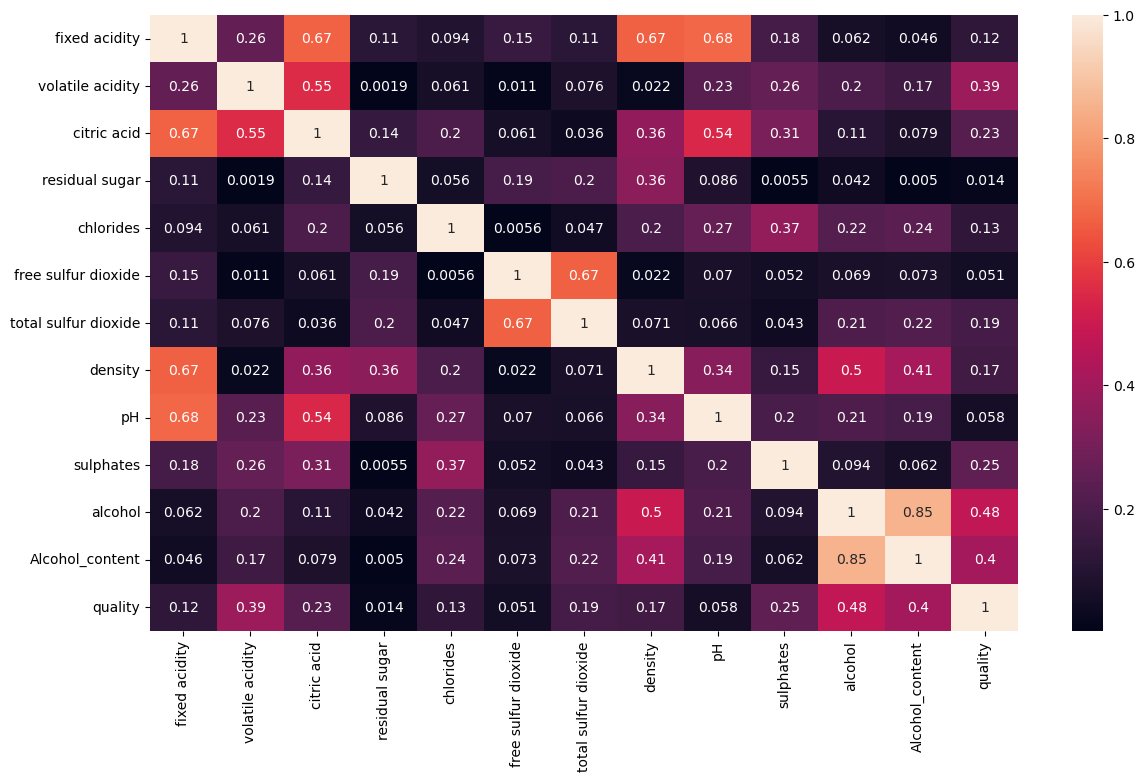

In [11]:
df_corr=data.corr().abs()# this code will get the coefficient of 1 variable vs all other variable(relatioship)
plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()



Seems Alcohol_content and alcohol are correlated as per above heatmap.but we need more proof

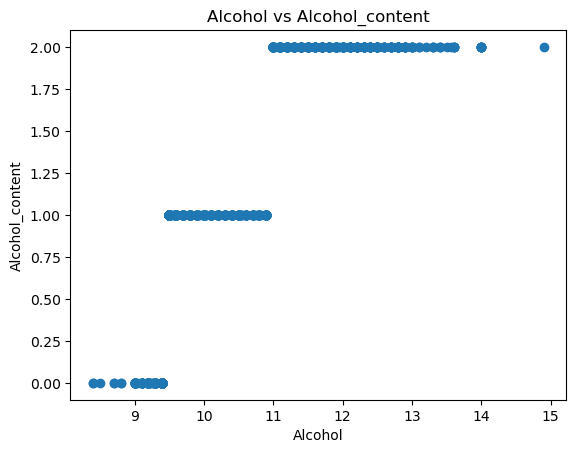

In [12]:
#make sure they are really correlated (it should follow same trend)
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

we can see clear trend as when alcohol level increases its content also increasing. So we can delete one of them

In [13]:
x=data.drop(columns=['quality','Alcohol_content'])
y=data['quality']



In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [15]:
#write one funcn and call as many as times to check accuracy_score of different models
#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n------------------TRain Result------')
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")   #train prediction score
    elif train==False:
        pred=clf.predict(x_test)
        print('\n-----------Test REsult-------')
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")    #test prediction score
        print("\n--Test classification report   \n",classification_report(y_test,pred,digits=2))  #model confidence accuracy
        


# model initiation


In [16]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
#call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:100.00%

-----------Test REsult-------
accuracy score:63.50%

--Test classification report   
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.09      0.09        11
           5       0.68      0.70      0.69       157
           6       0.68      0.65      0.66       168
           7       0.57      0.58      0.57        57
           8       0.20      0.25      0.22         4

    accuracy                           0.64       400
   macro avg       0.37      0.38      0.37       400
weighted avg       0.64      0.64      0.64       400



# Lets understand confusion_matrix for multiclass


In [18]:
#prediction for confusion matrix
y_pred=clf.predict(x_test)
#create confusion matrix
confusion_matrix(y_test,y_pred)

array([[  0,   1,   2,   0,   0,   0],
       [  1,   1,   7,   2,   0,   0],
       [  1,   6, 110,  35,   5,   0],
       [  1,   3,  35, 109,  18,   2],
       [  0,   1,   7,  14,  33,   2],
       [  0,   0,   1,   0,   2,   1]], dtype=int64)

In [19]:
#converting into dataframe to understand this better
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Q3','Q4','Q5','Q6','Q7','Q8'], index=['Q3','Q4','Q5','Q6','Q7','Q8'])


,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,1,2,0,0,0
Q4,1,1,7,2,0,0
Q5,1,6,110,35,5,0
Q6,1,3,35,109,18,2
Q7,0,1,7,14,33,2
Q8,0,0,1,0,2,1


In [20]:
#we are tuning 4 imp hyper-parameters right now , we are passing the diff value for both parameters
grid_param={'criterion':['gini','entropy'],
          'max_depth': range(10,150),
           'min_sample_leaf':range(2,6)#the min no of sample required to be at a leaf node
           ,'min_samples_split':range(3,8)#the min no of sample required to split an internal node
            ,'max_leaf_nodes':range(5,10)}

In [21]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
#use all the cores in ur system .for performance improvement

In [22]:
grid_search.fit(x_train,y_train)

ValueError: Invalid parameter min_sample_leaf for estimator DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5). Check the list of available parameters with `estimator.get_params().keys()`.

In [24]:
best_parameters=grid_search.best_params_
print(best_parameters)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# initiate decision tree classifier with new parameters and train

In [28]:
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=6,max_depth=8,min_samples_leaf=2)

In [29]:
# train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=6)

In [30]:
#call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:77.73%

-----------Test REsult-------
accuracy score:55.75%

--Test classification report   
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.12      0.18      0.14        11
           5       0.59      0.62      0.60       157
           6       0.58      0.61      0.60       168
           7       0.61      0.35      0.44        57
           8       0.25      0.25      0.25         4

    accuracy                           0.56       400
   macro avg       0.36      0.34      0.34       400
weighted avg       0.57      0.56      0.56       400



# Ensemble approach (best algorithm in ml)

Can be used for both classification and regression it doesnot based on single model it use to build more model and based on that they use to take the decision

    emble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote.

# Bagging(bootstap aggregation)

Bagging (Bootstrap Aggregation) is used to reduce the variance of a decision tree. Suppose a set D of d tuples, at each iteration i, a training set Di of d tuples is sampled with replacement from D (i.e., bootstrap). Then a classifier model Mi is learned for each training set D < i. Each classifier Mi returns its class prediction. The bagged classifier M* counts the votes and assigns the class with the most votes to X (unknown sample).

    Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
    A base model is created on each of these subsets.
    Each model is learned in parallel from each training set and independent of each other.
    The final predictions are determined by combining the predictions from all the models.
    
    if bootstrap=True(with replacement)
    suppose in dtee1 it can randomly pick some feature in Dtree1
    same feature can be used for building Dtree2
    
    
    if bootstrap=False(pasting wihout replacement)
    
    



# OUT OF BAG EVALUATION

    MEANS SOME PORTION WILL BE KEPT OUT OF BAG FOR EVALUATION PURPOSE also called as test data

# bagging classifier

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
dataset=load_breast_cancer()
x=dataset.data
y=dataset.target

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [38]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8951048951048951

In [36]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,random_state=3,oob_score=True)
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.9020979020979021

lets not use bootstrap and see the model accuracy remember this is "pasting"


In [40]:
pasting_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=False,random_state=3)
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.8881118881118881

# Random Forest Algorithm
    As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.


Why use Random Forest?
    Below are some points that explain why we should use the Random Forest algorithm:

    It takes less training time as compared to other algorithms.
    It predicts output with high accuracy, even for the large dataset it runs efficiently.
    It can also maintain accuracy when a large proportion of data is missing.


# cardiovascular disease-z score

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing,normalization
from sklearn.preprocessing import StandardScaler


# model building
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [47]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [48]:
df.shape

(69301, 13)

In [49]:
df.drop('id',axis=1,inplace=True)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
#observation
#1 no missing value
#2 assuming age is in no of days
#3 outliers in systolic blood pressure-ap_high
#4 outliers in ap_low
#5 outlier  in height
#6 seems chlestroland glucose are binary will see in the further analysis
 #how to remove duplicates
    # duplicate removal
df.drop_duplicates(inplace=True)
df.shape

(69277, 12)

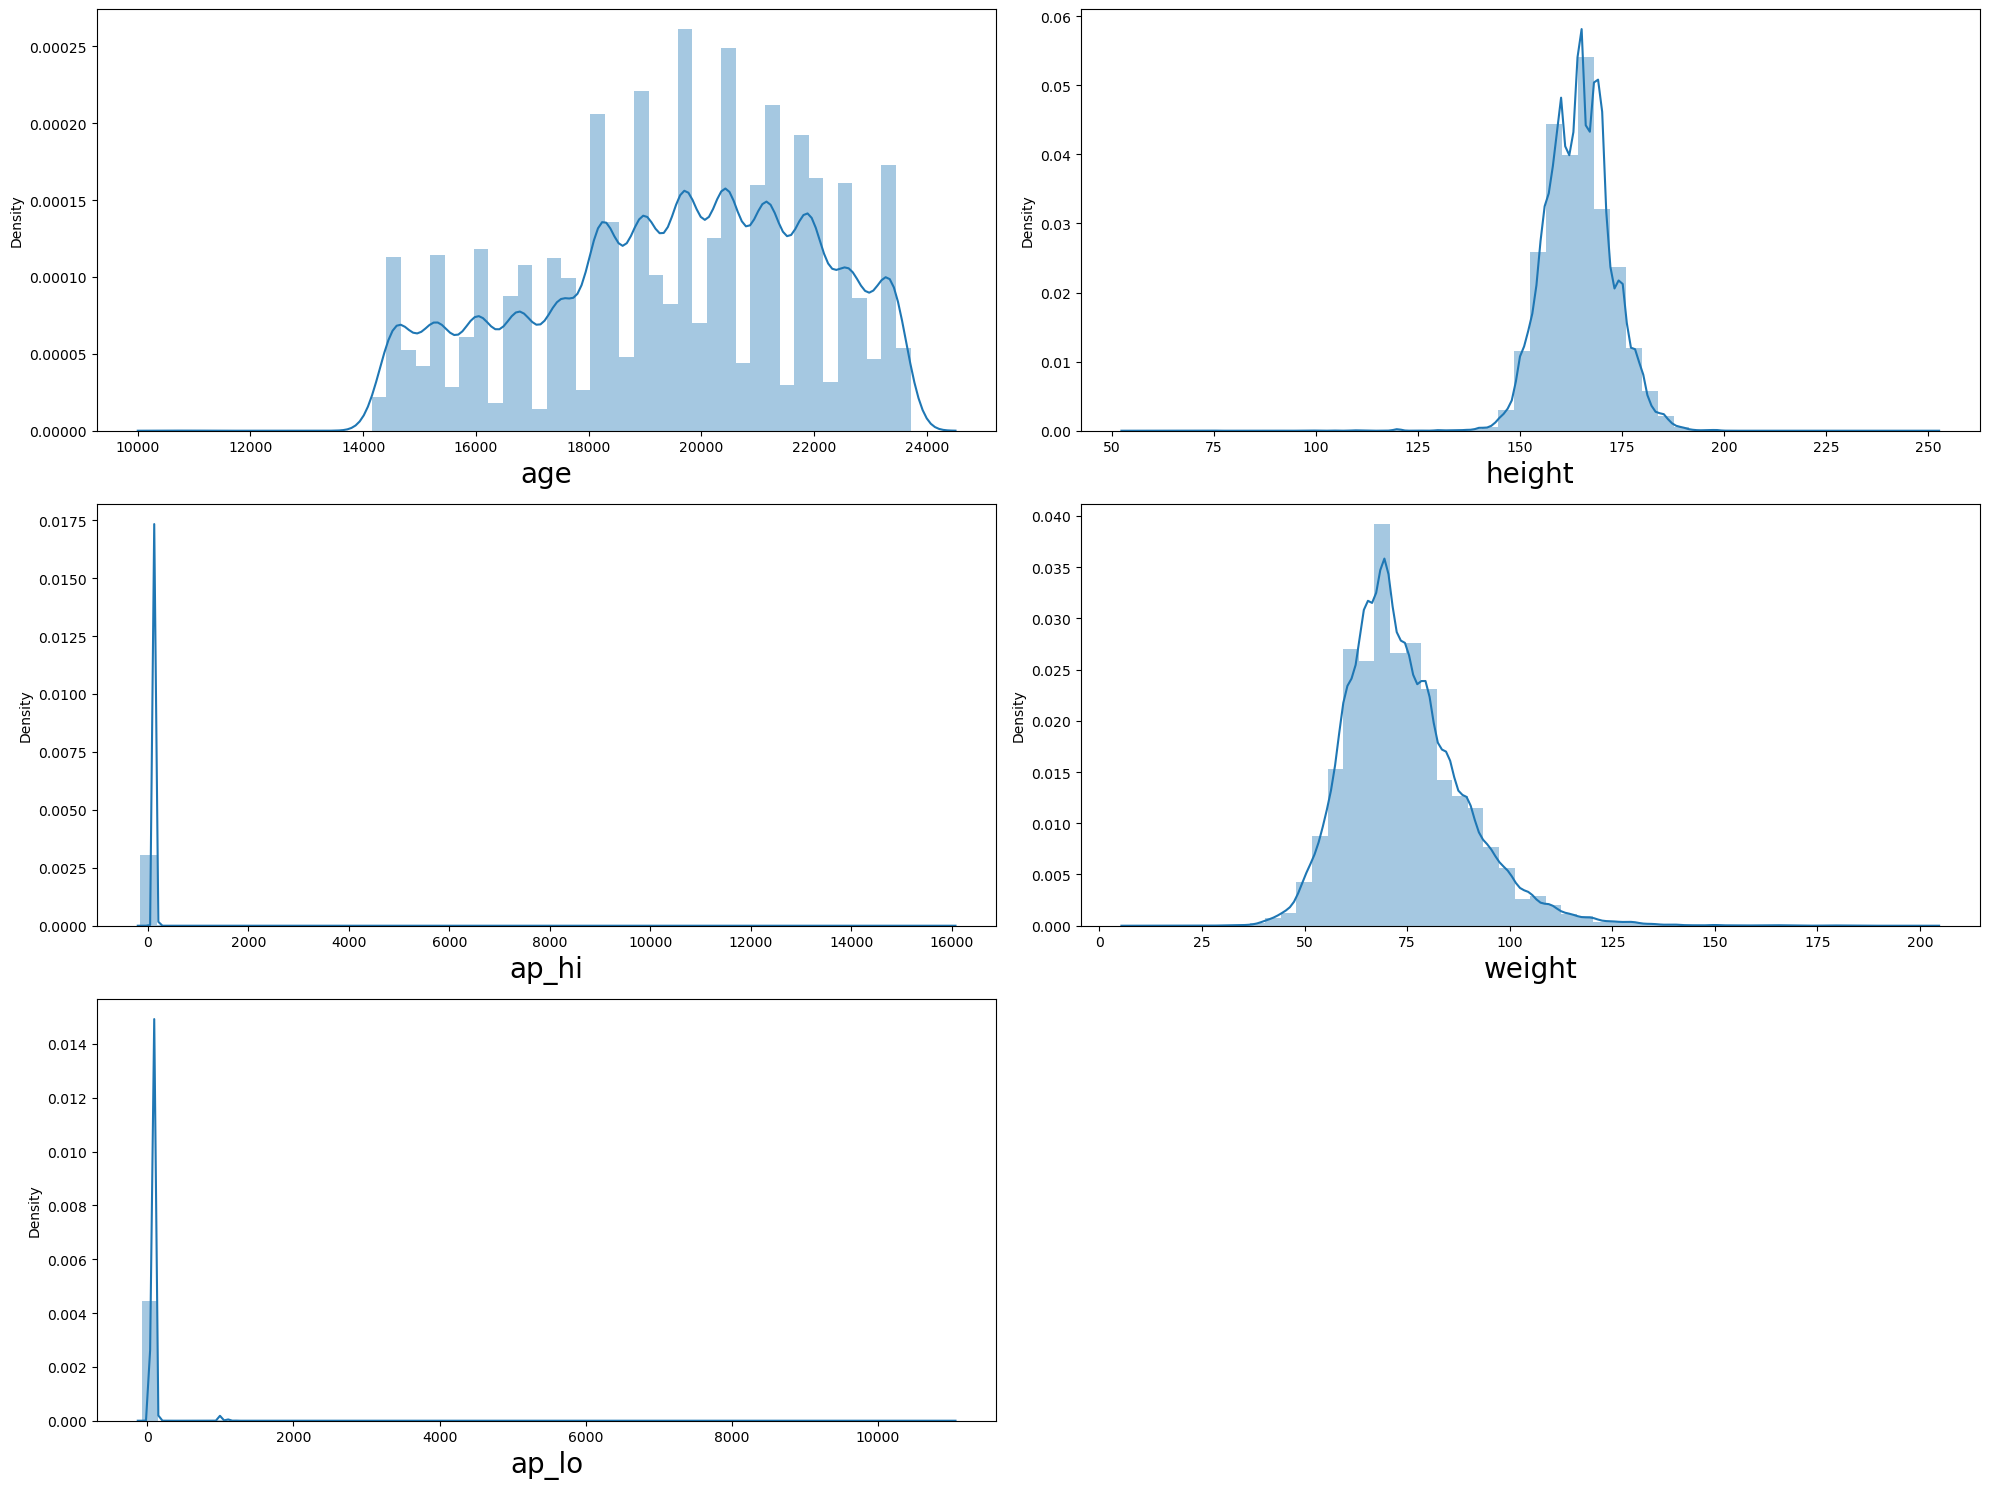

In [53]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()

# another way to eliminate outlier:


    zdistribution/statistics= StandardScaler
    lets transform our normal distribution into z distribution(standard normal distribution)where mean=0 and std=1
    z=(x-mean)/std
    #with std 3 lets see the stats
    #from scipy import stats

In [54]:
    from scipy.stats import zscore
    

In [56]:
z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)#apply the formula &get scale data
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


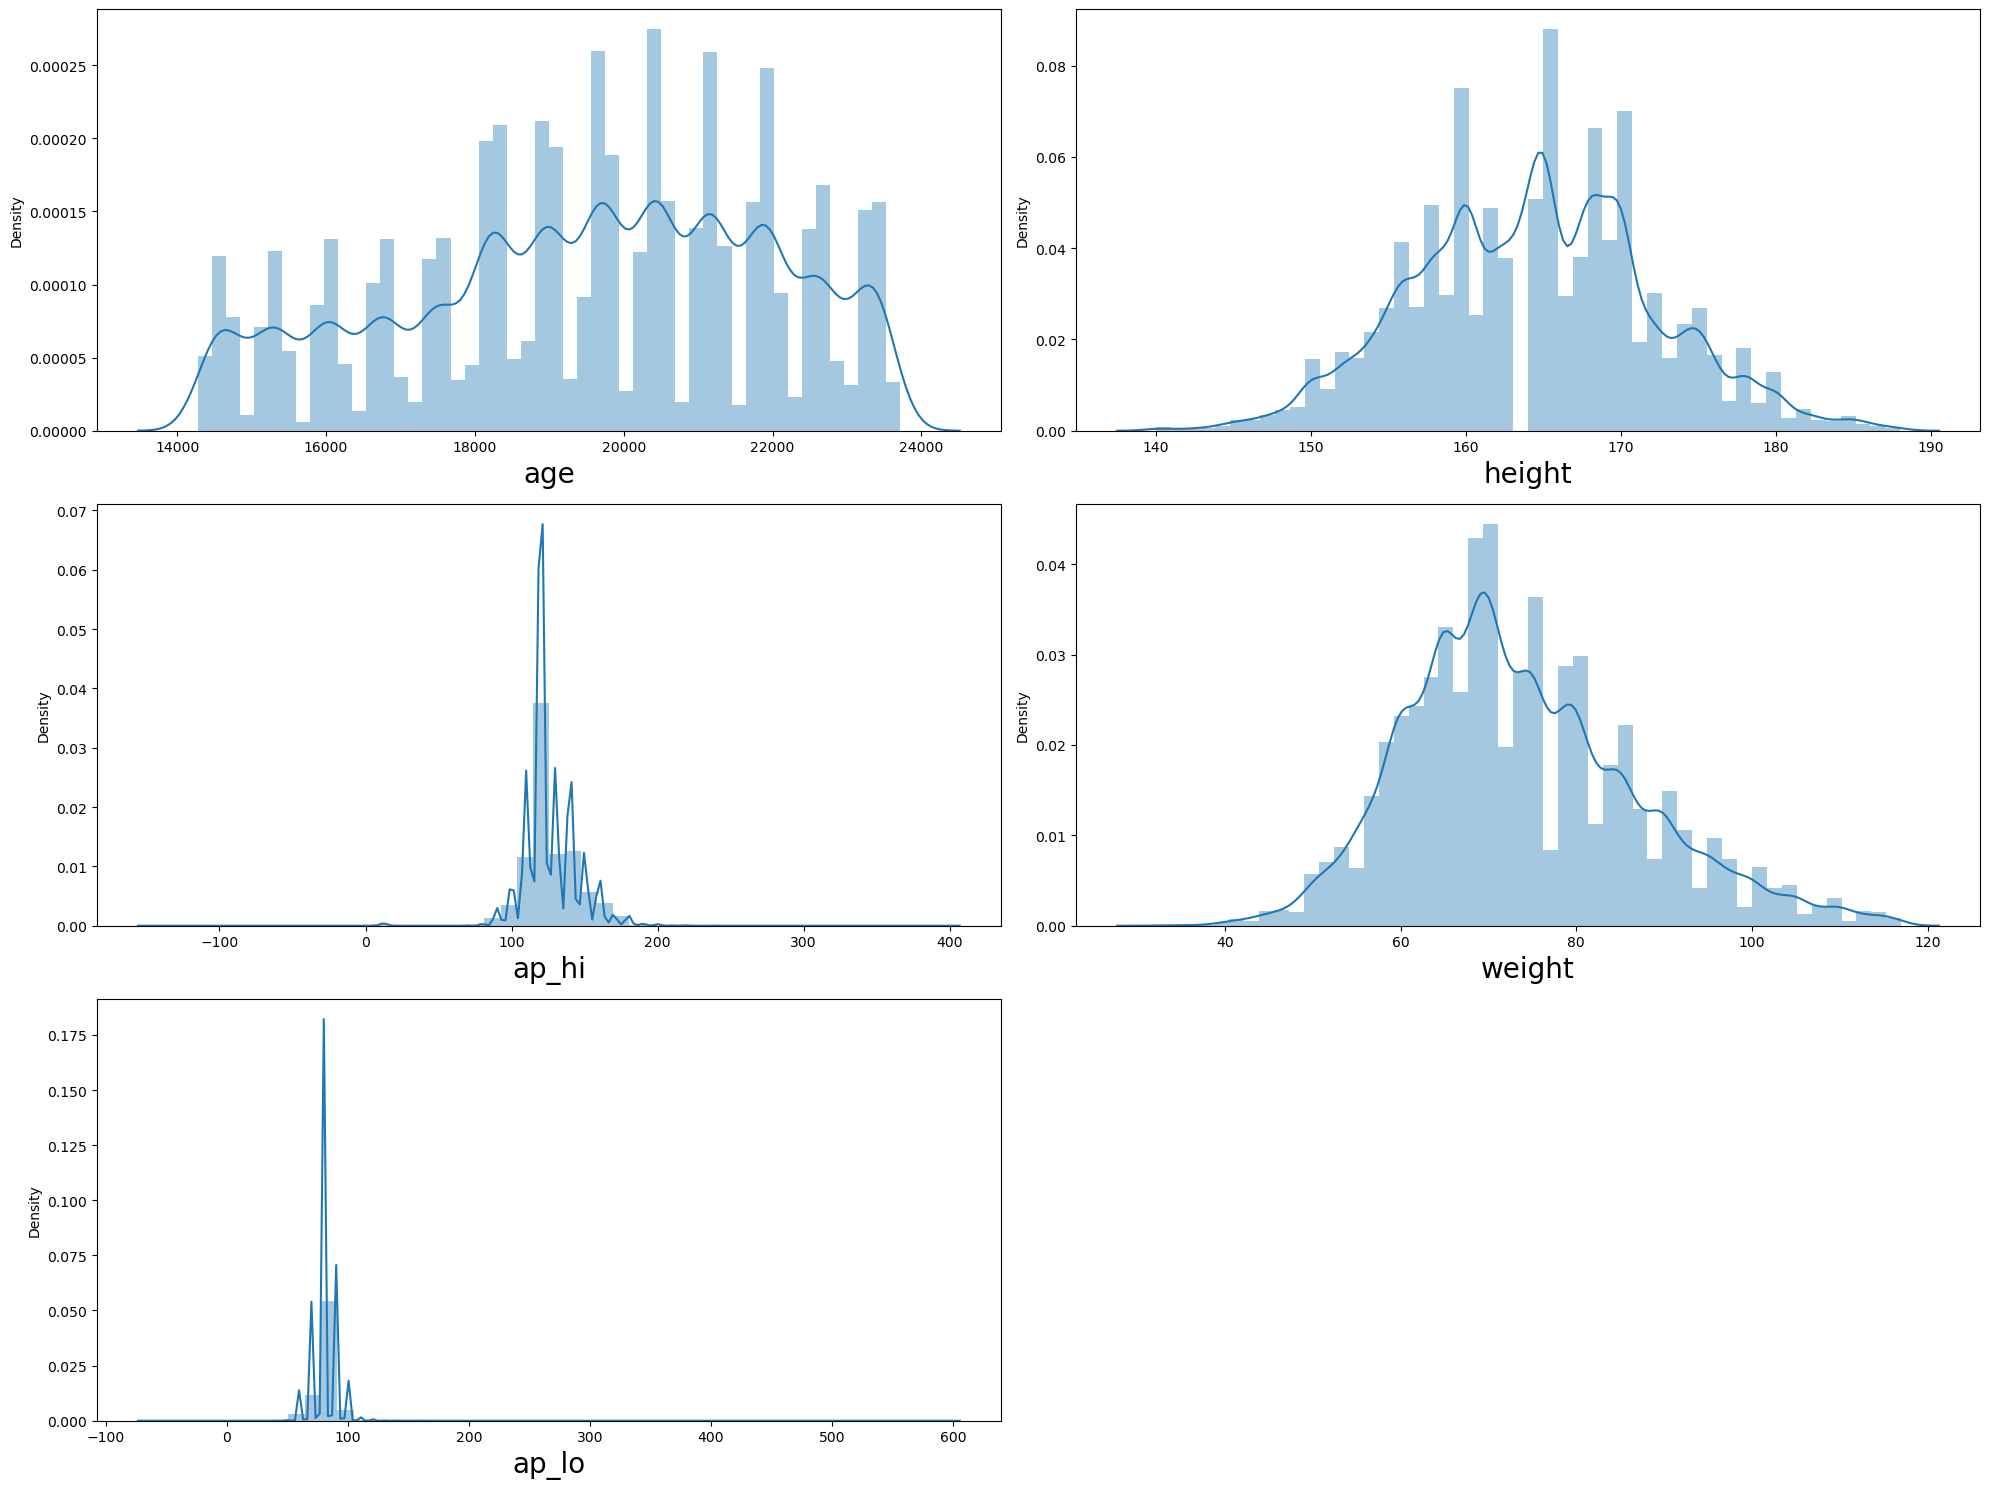

In [58]:
#check how much skewness was removed
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()

1 you can use correlation matrix and plot heatmap to check for multicollinearity or correlation b/w all variables(refer decision tree algo for heat map)
2 you can use VIF to check if there is any multicollinearity(refer logistic regression for VIF)


In [59]:
# cannot make out much from the above plot,lets buildmodel
x=df.drop(columns=['cardio'],axis=1)
y=df['=cardio']

In [61]:
#split into train_test data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=41)

# model confidence/accuracy


In [62]:

#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n------------------TRain Result------')
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")   #train prediction score
    elif train==False:
        pred=clf.predict(x_test)
        print('\n-----------Test REsult-------')
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")    #test prediction score
        print("\n--Test classification report   \n",classification_report(y_test,pred,digits=2))  #model confidence accuracy
        


In [63]:
#initate randomforest classifier and train
random_clf=RandomForestClassifier()
#train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
#call the function and pass dataset to check train and test score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:99.98%

-----------Test REsult-------
accuracy score:71.39%

--Test classification report   
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.72      0.69      0.71      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



# lets  tune the parameters using GridSearchCV

In [66]:
#RandomForestClassifier
params={'n_estimators':[13,15],'criterion':['entropy','gini'],
        'max_depth':[10,15],'min_samples_split':[10,11],'min_samples_leaf':[5,6]}
grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params',grd.best_params_)

best_params {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [68]:
random_clf=grd.best_estimator_#reinstantiating with best  params
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=15)

In [69]:
#call the function and pass dataset to check train and test score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:76.93%

-----------Test REsult-------
accuracy score:73.09%

--Test classification report   
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     10243
           1       0.75      0.69      0.72      9965

    accuracy                           0.73     20208
   macro avg       0.73      0.73      0.73     20208
weighted avg       0.73      0.73      0.73     20208



NOTE
you can impove the performance by tweaking preprocessing methods
lets plot ROCAUC curve(applied on classification model) to choose the best

In [70]:
#plot ROC/AUC for multiple model without hyperparams tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [72]:
# load ur data and split it into training and testing sets
x=df.drop(columns=['cardio'],axis=1)
y=df['cardio']
#split into train_test data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=52)
#train ur model

lr=LogisticRegression()
df=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()


threshold of LogisticRegression [1.99626576e+00 9.96265758e-01 9.96241356e-01 ... 4.33563130e-03
 4.25102117e-03 5.38030015e-05]
threshold of RandomForestClassifier [2.         1.         0.99       0.98       0.97       0.96
 0.95       0.94       0.93       0.92       0.91       0.9
 0.89       0.88       0.87       0.86       0.855      0.85
 0.845      0.84       0.83       0.825      0.82       0.81
 0.8        0.79       0.7815     0.78       0.77       0.76
 0.75       0.74       0.73933333 0.735      0.73       0.7275
 0.72483333 0.72       0.71       0.7        0.69       0.68333333
 0.68       0.67       0.66       0.65       0.64       0.63
 0.625      0.62333333 0.62       0.61       0.605      0.6
 0.59       0.58       0.57       0.56       0.55       0.54
 0.53       0.52       0.51266667 0.51       0.5        0.49
 0.48       0.47333333 0.47       0.46333333 0.46       0.45
 0.445      0.44       0.43       0.427      0.42       0.41833333
 0.41       0.405      0.4    

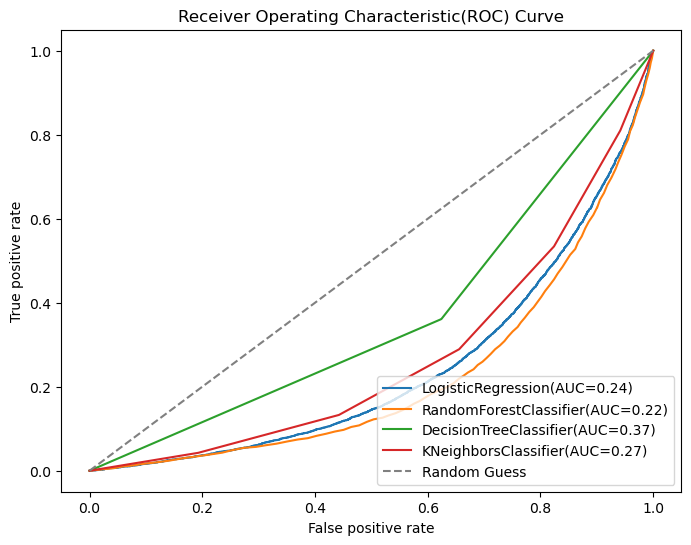

In [76]:
models={'LogisticRegression':lr,'RandomForestClassifier':rf,'DecisionTreeClassifier':df,'KNeighborsClassifier':kn}
#calculate the Roc curve and auc scores for each model
plt.figure(figsize=(8,6))
for name,models in models.items():
    models.fit(x_train,y_train)
    y_prob=models.predict_proba(x_test)[:,1]
    tpr,fpr,_=roc_curve(y_test,y_prob)
    print('threshold of',name,_)
    roc_auc=auc(fpr,tpr)
    #plot the roc curve
    plt.plot(fpr,tpr,label='{}(AUC={:.2f})'.format(name,roc_auc))
#add labels and legend to the plot
plt.plot([0,1],[0,1],linestyle='--',color='grey',label='Random Guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc='lower right')
#show the plot
plt.show()

# AdaBoost_Heatmap_Randomize Search

# boosting

    in this the model will be build sequentiaclly 
    1 will pass to 2 , 2 will pass to 3 and so on and at last prediction will be 
    
    training sample-weighted sample-weighted sample---final classifier
    
    it is an ensemble approach (meaning it involved several trees)that starts from weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision_maker
    
    
    
    Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 


  advantages
Improved Accuracy – Boosting can improve the accuracy of the model by combining several weak models’ accuracies and averaging them for regression or voting over them for classification to increase the accuracy of the final model. 


Robustness to Overfitting – Boosting can reduce the risk of overfitting by reweighting the inputs that are classified wrongly. 

Better handling of imbalanced data – Boosting can handle the imbalance data by focusing more on the data points that are misclassified 



# Ada boost(adaptive boosting)

AdaBoost short for Adaptive Boosting is an ensemble learning used in machine learning for classification and regression problems. The main idea behind AdaBoost is to iteratively train the weak classifier on the training dataset with each successive classifier giving more weightage to the data points that are misclassified. The final AdaBoost model is decided by combining all the weak classifier that has been used for training with the weightage given to the models according to their accuracies. The weak model which has the highest accuracy is given the highest weightage while the model which has the lowest accuracy is given a lower weightage. 



In [77]:
import pandas as pd
heart_data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
heart_data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# python implementation

In [78]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv') # regression problem
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [81]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [83]:
#finding out the correlation b/w the features
corr=data.corr()
corr.shape


(14, 14)

In [84]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


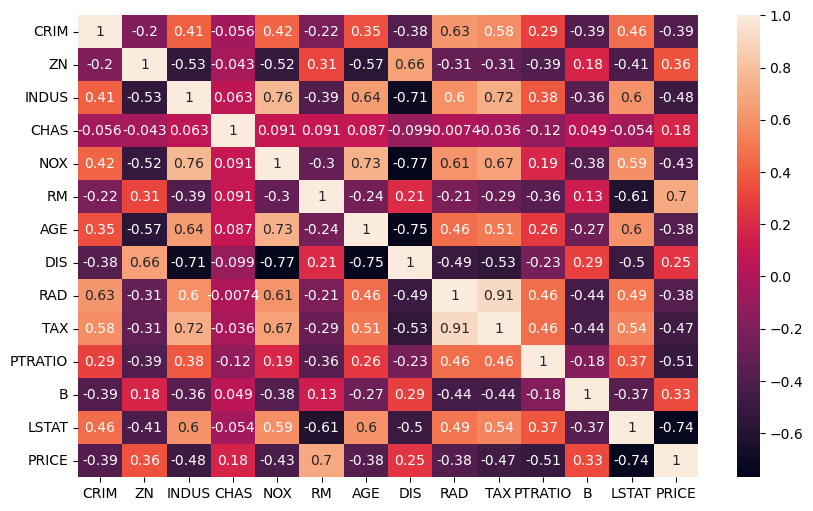

In [86]:
# plotting the heatmap of correlation b/w features
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

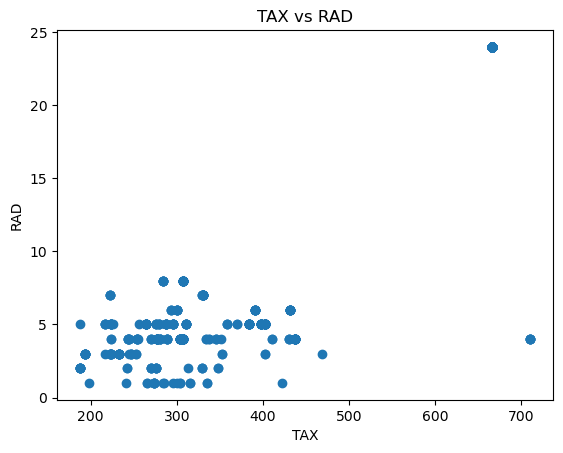

In [87]:
#seems rad and tax are correlated .lets check with scatter plot
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

In [89]:
# since we cannot configure with plot that, there is a close relation, so we will not take risk and not delating any feature
#divide feature and label data
x=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']


In [90]:
#train test split(hold out method)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

# Adaboost model training

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [93]:
#model prediction on train data
y_pred=ada.predict(x_train)

In [94]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70
46,0.18836,0.0,6.91,0,0.4480,5.786,33.3,5.1004,3,233,17.9,396.90,14.15
50,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45
308,0.49298,0.0,9.90,0,0.5440,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [95]:
y_pred[:6]

array([17.89341317, 21.43448276, 21.77733333, 25.71958042, 20.73589744,
       25.61463415])

In [97]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R square score',accuracy)

R square score 0.9083187339797901


# since the model is already seen the data , so it is producing better score

In [98]:
#predicting test data with the model
y_test_pred=ada.predict(x_test)

In [99]:
#model evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('Rsquare score',accuracy)

Rsquare score 0.796067979583055


# hyperparameter using Randomised Search CV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.09,0.25,0.30]}
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=60)

In [104]:
ada=AdaBoostRegressor(learning_rate=0.25,n_estimators=47)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [105]:
print('-----accuracy post tuning----')
print(metrics.r2_score(y_test,y_pred))

-----accuracy post tuning----
0.8508722460735231


# Gradient boosted trees/gbdt/gradient boosting
part of boosting or ensemble technique
    it will try to reduce the error/residual means accuracy will increase,if there is no significant improvement in residuals it will stop
    residual=actual-predicted
    newvalue=old value+(learning rate*residual)

In [106]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [111]:
#just find correlation of feature with target
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

# visualize the correlation

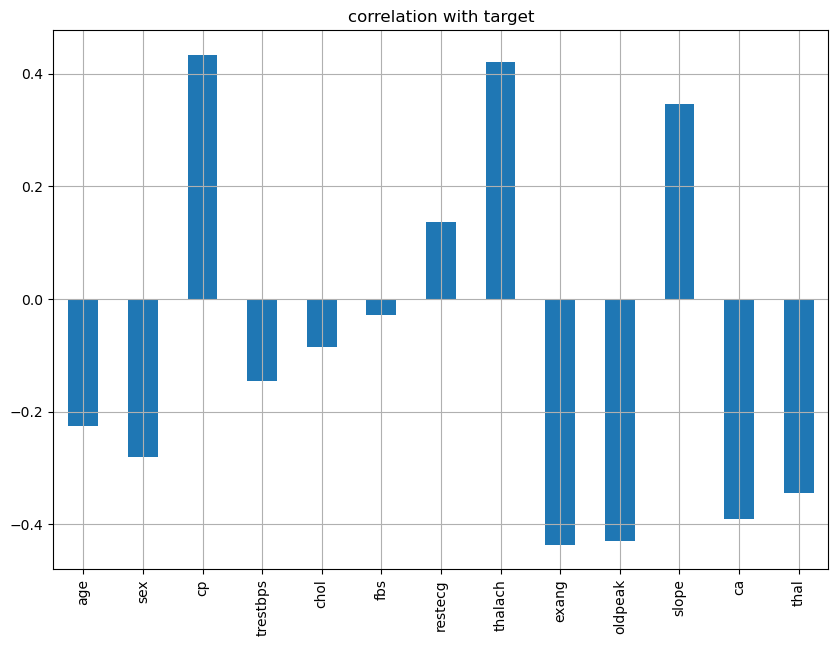

In [112]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),title='correlation with target')
plt.show()

which is close to 0 ignore it

# lets work on feature selection and see if that can help us building better model

model building using SelectPercentile features

In [113]:
from sklearn.feature_selection import SelectPercentile,chi2

we can apply chi2 we get p-value for all feature.based on the p-value it will select top 80% of features
ex=if p-value <0.05 it will reject null hypothesis.default null hypothesis is there is no relation b/w feature and target
    null hypothesis=there is no relationship exist b/w feature and label
    alternate hypothesis= there is a relationship b/w feature and label

In [114]:
# instantiate SelectPercentile and fit(feature,label)
x=df.drop(['target'],axis=1)
y=df.target
spercentile=SelectPercentile(score_func=chi2,percentile=80)
spercentile=spercentile.fit(x,y)

In [115]:
#seperate the feature to check p-value
cols=spercentile.get_support(indices=True)#to retain index no instead of boolean
print('feature Index=',cols)
features=x.columns[cols]
print('feature=',list(features))

feature Index= [ 0  1  2  3  4  7  8  9 10 11]
feature= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [119]:
df_scores=pd.DataFrame({'features':x.columns,'Chi2Score':spercentile.scores_,'pvalue':spercentile.pvalues_})
df_scores.sort_values(by='Chi2Score',ascending=False)

,features,Chi2Score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


lets print top 80% feature

In [120]:
#createsubset of selected features
x=df[features]
y=df.target

In [121]:
# import libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.3,random_state=42)

# Gradient boosting classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:

#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n------------------TRain Result------')
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")   #train prediction score
    elif train==False:
        pred=clf.predict(x_test)
        print('\n-----------Test REsult-------')
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")    #test prediction score
        print("\n--Test classification report   \n",classification_report(y_test,pred,digits=2))  #model confidence accuracy
        


In [123]:
#initate Gradient Boosting Classifier
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [124]:
#call the function and pass dataset to check train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:100.00%

-----------Test REsult-------
accuracy score:83.52%

--Test classification report   
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# Hyperparameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid_param={'max_depth':range(4,8),
           'min_samples_split': range(2,8,2),
           'learning_rate':np.arange(.1,.3)}

In [128]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [129]:
gbdt_clf=GradientBoostingClassifier(max_depth=4,min_samples_split=2,learning_rate=.1)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4)

In [130]:
#call the function and pass dataset to check train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:100.00%

-----------Test REsult-------
accuracy score:82.42%

--Test classification report   
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# catboost= Categorical Boosting
   if the dataset has more categorical features its classification problem

In [131]:
!pip install Catboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 101.0/101.0 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [132]:
import catboost as cb

In [135]:
#create the catboost classifier
cat_clf=cb.CatBoostClassifier(iterations=100,learning_rate=.1,depth=5,random_seed=42,verbose=0)
cat_clf.fit(x_train,y_train)

In [136]:
#call the function and pass dataset to check train and test score
metric_score(cat_clf,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(cat_clf,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:95.28%

-----------Test REsult-------
accuracy score:86.81%

--Test classification report   
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# XG Boost

    XGBoost is also a boosting machine learning algorithm, which is the next version on top of the gradient boosting algorithm. The full name of the XGBoost algorithm is the eXtreme Gradient Boosting algorithm, as the name suggests it is an extreme version of the previous gradient boosting algorithm.

    The main difference between GradientBoosting is XGBoost is that XGbost uses a regularization technique in it. In simple words, it is a regularized form of the existing gradient-boosting algorithm.

    Due to this, XGBoost performs better than a normal gradient boosting algorithm and that is why it is much faster than that also. It also performs better when there is a presence of numerical and categorical features in the dataset.

Advantages
1 the main advantage of xgboost is its lightning speed compare to other algorithms
2 it uses parallel processing to increase the speed
3 sequential tree growing
4 xgboost also handle missing values in the dataset. so in datawarangling, you may or may not do separate treatment for the missing values becoz xgboost is capable handling missing values internally

In [137]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 2.2 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [13]:
import zipfile
from io import BytesIO

In [16]:
df=pd.read_csv(,compression='zip')
df.head()

SyntaxError: invalid syntax (1213473768.py, line 1)

# how to deal imbalanced dataset
    this  is only for classification model, if target variables having imbalanced class how to deal


In [17]:
#you can imbalance the diabetes file yourself.open csv file directly and change most of 1 to 0 and make it imbalance
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [18]:
# counter module to count each class
from collections import Counter
Counter(df['Outcome'])

Counter({0: 720, 1: 48})

In [19]:
x=df.drop('Outcome',axis=1)
y=df.Outcome
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75, random_state=41)

In [20]:
Counter(y_train)

Counter({1: 32, 0: 544})

# Over sampling using SMOTE(synthetic minority oversampling techniques)
    1 this technique can be used when u have small dataset
    2 this uses the euclidian distance method and find the closest datapoints to thr minority class and create new minority data points

In [22]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'imblearn'

In [2]:
ove_smp=SMOTE(random_state=41,k_neighbors=3,sampling_strategy=.75)
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print('the no of classes before fit{}'.format(Counter(y_train)))
print('the no of classes after fit {}'.format(Counter(y_train_ns)))

NameError: name 'SMOTE' is not defined

# downsampling using nearmiss
    this techniques can be used when u hv large data set
    it uses euclidean distance method to find the closest datapt to the minority class and will eliminate the majority datapts which are not close to minority data pts

In [4]:
from imblearn.under_sampling  import NearMiss

ModuleNotFoundError: No module named 'imblearn'

In [5]:
ds=NearMiss(n_neighbors=3,sampling_strategy=.5)
x_train_ns,y_train_ns=ds.fit_resample(x_train,y_train)
print('the no of classes before fit{}'.format(Counter(y_train)))
print('the no of classes after fit {}'.format(Counter(y_train_ns)))

NameError: name 'NearMiss' is not defined

# Log-power transformer

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [10]:
data.shape

(768, 9)

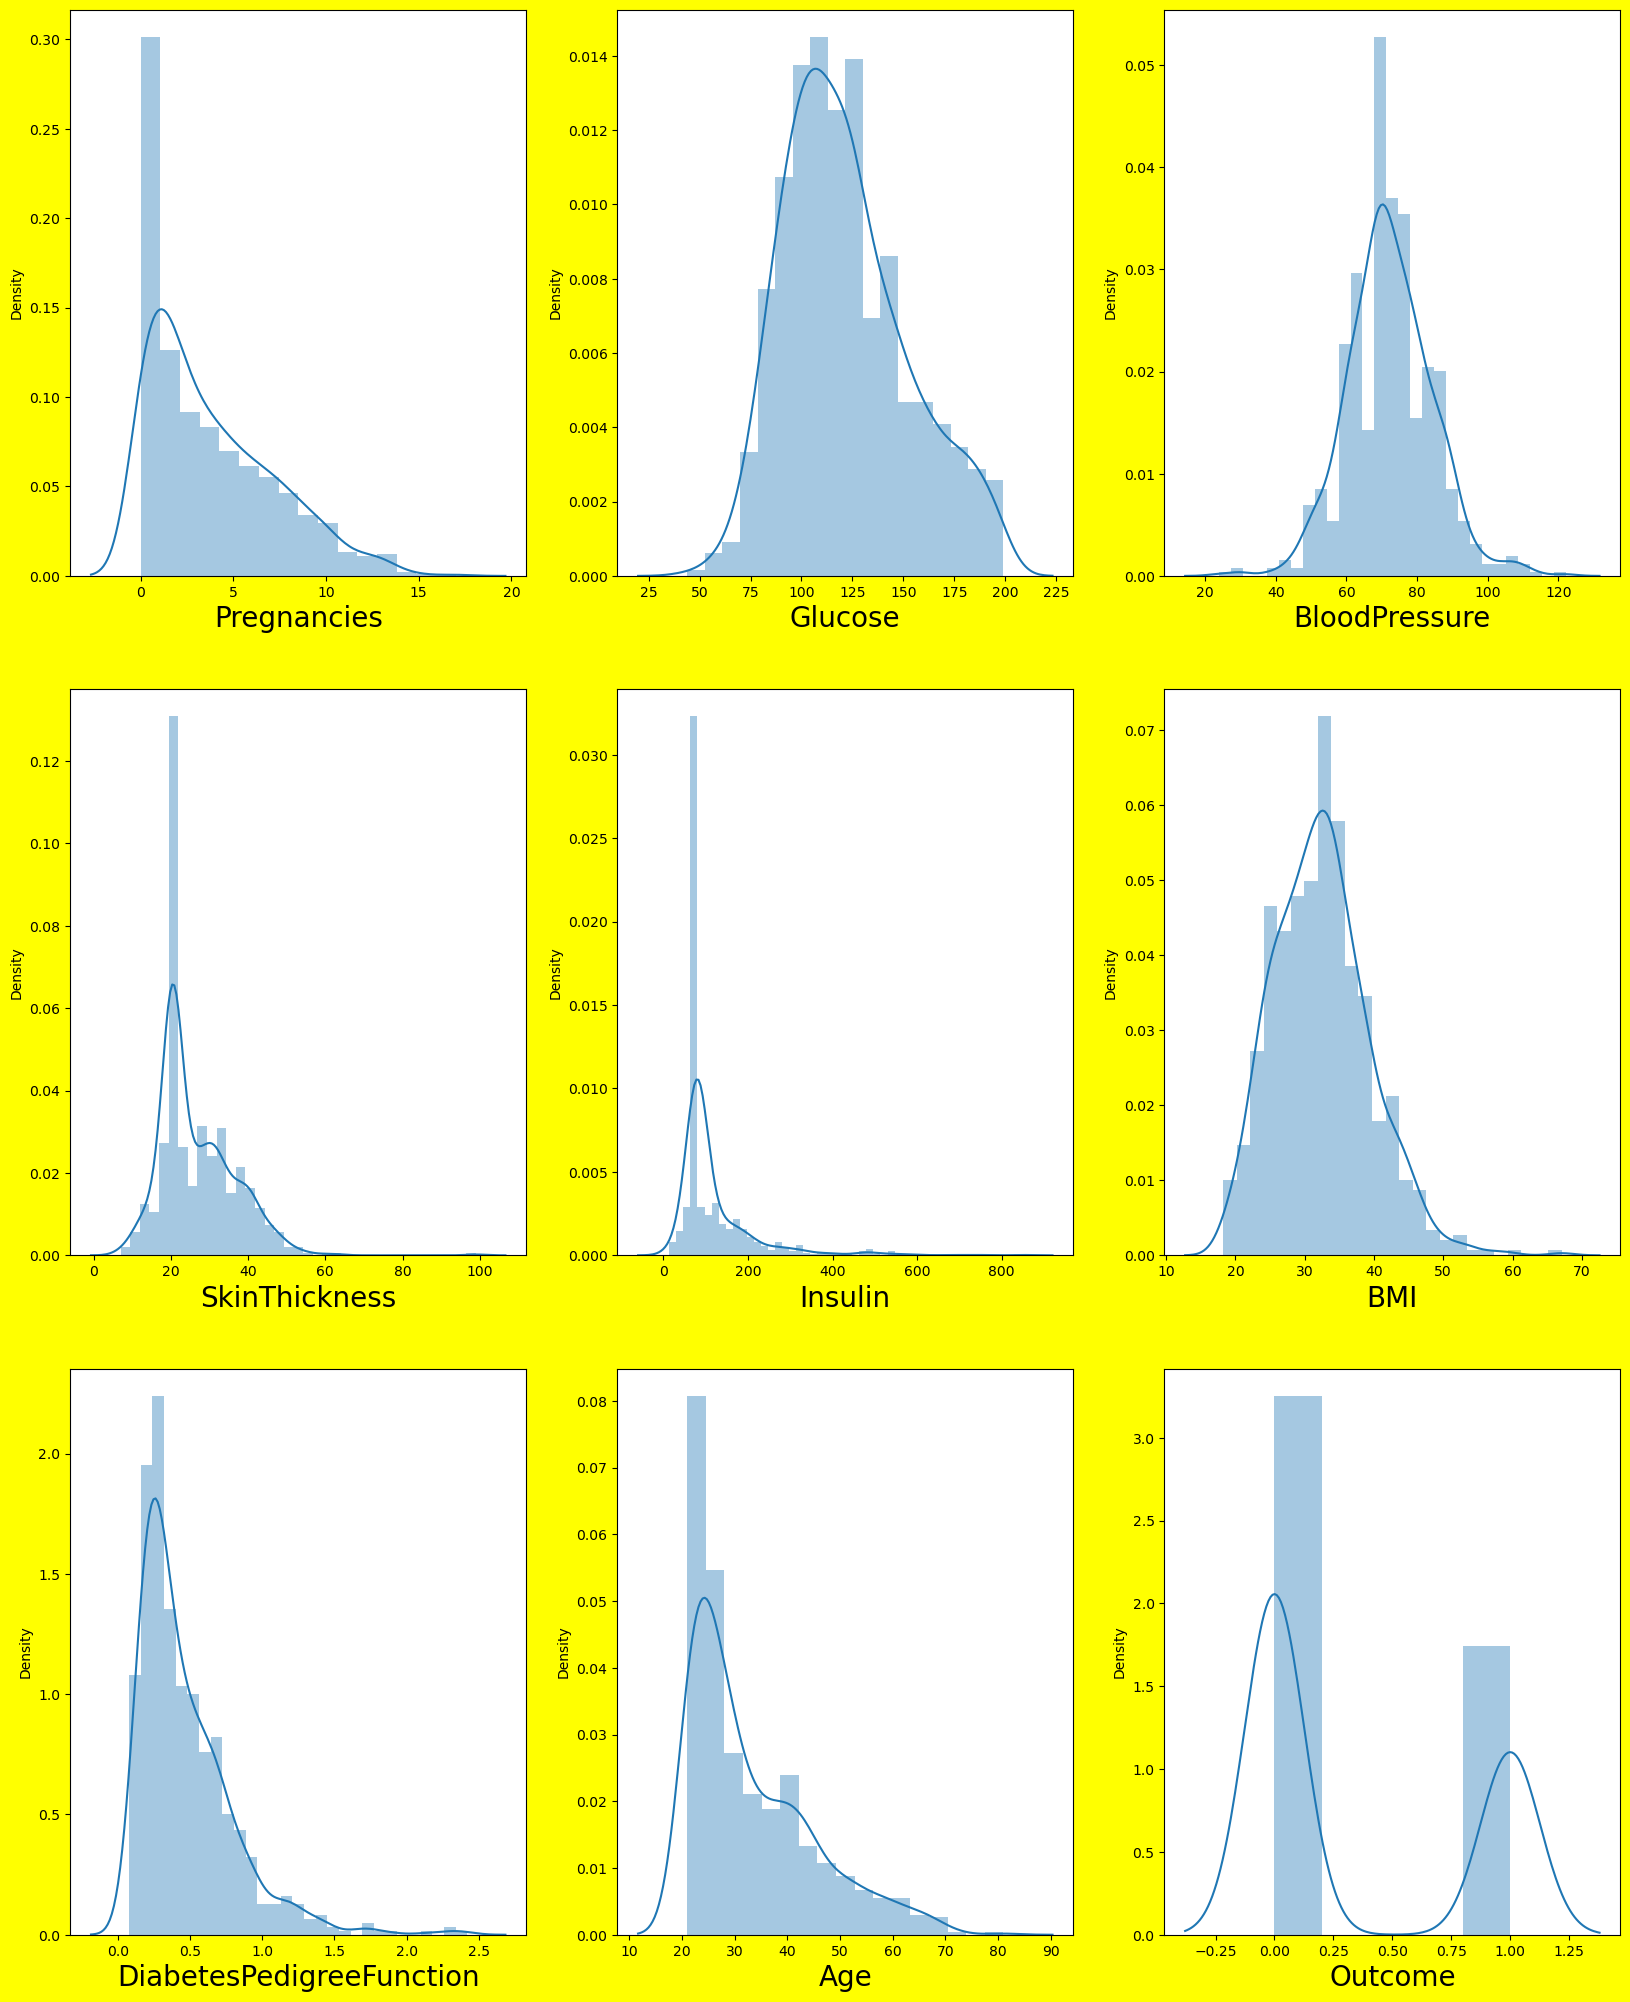

In [11]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

# Apply log transformation on continues variable
     it  ais primiraly used to convert askewed distribution to a normal distribution(less-skewed distribution).in this transformation we take log

In [12]:
data['Insulin']=np.log(data['Insulin'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['BMI']=np.log(data['BMI'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])
data['Age']=np.log(data['Age'])


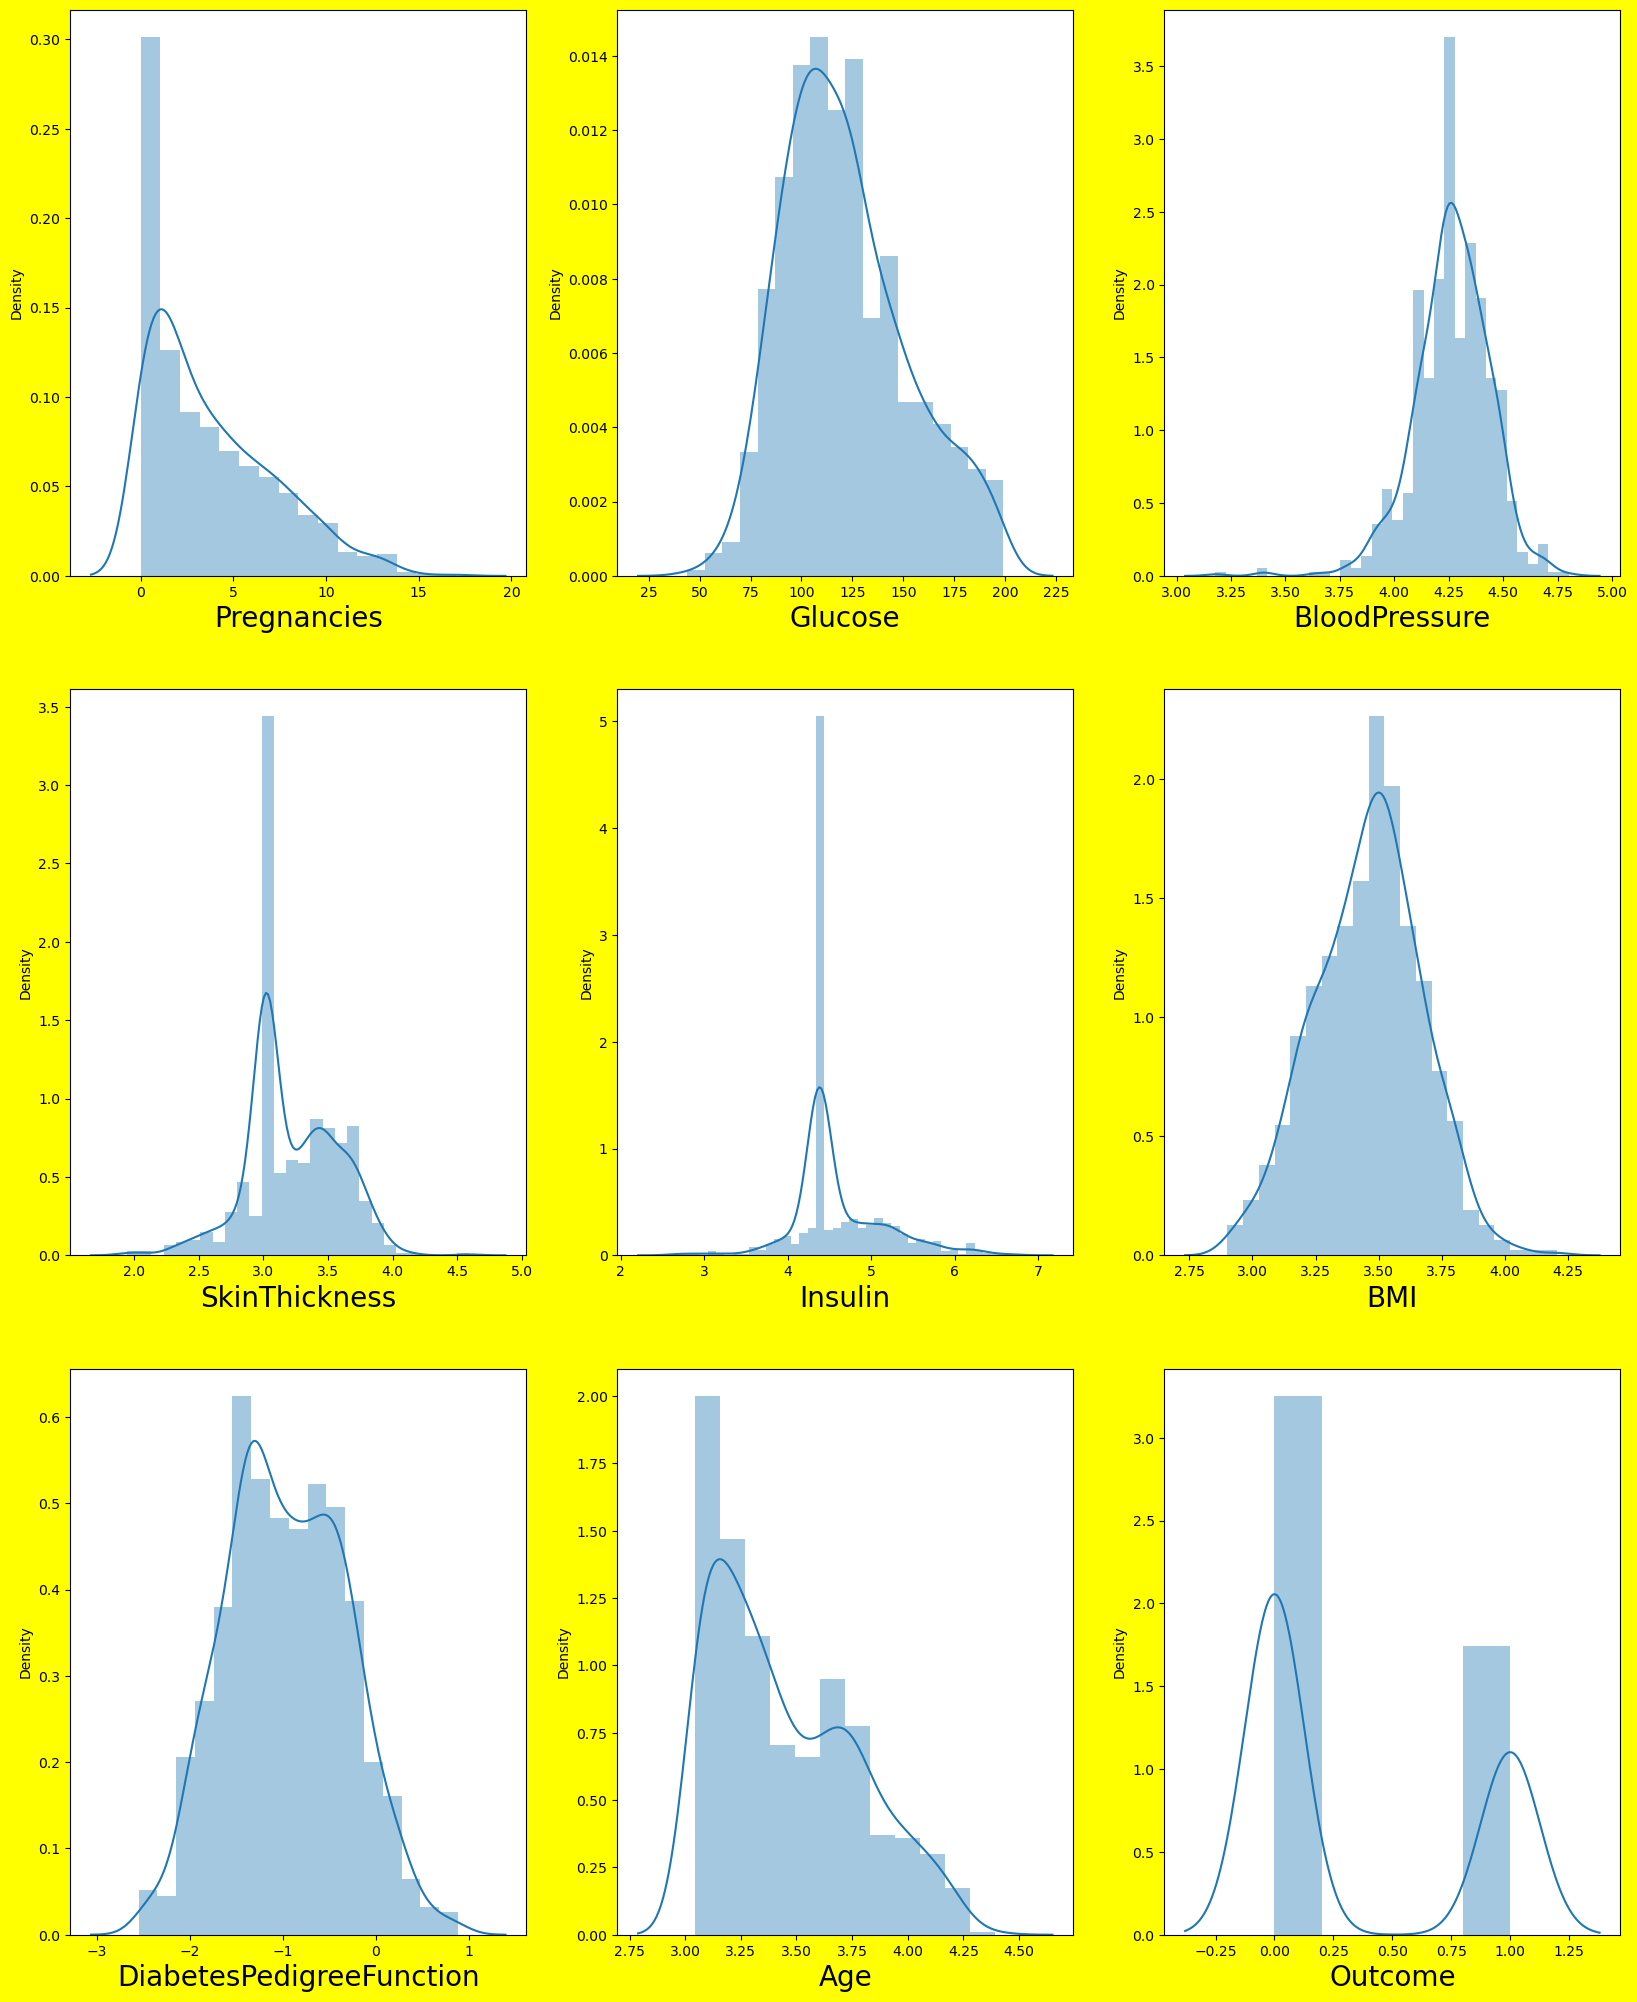

In [13]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

# Power transformer
    stablize the variance convert the skewed data to normal data

In [20]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [22]:
features=['Insulin','BMI','SkinThickness','BloodPressure','Age']

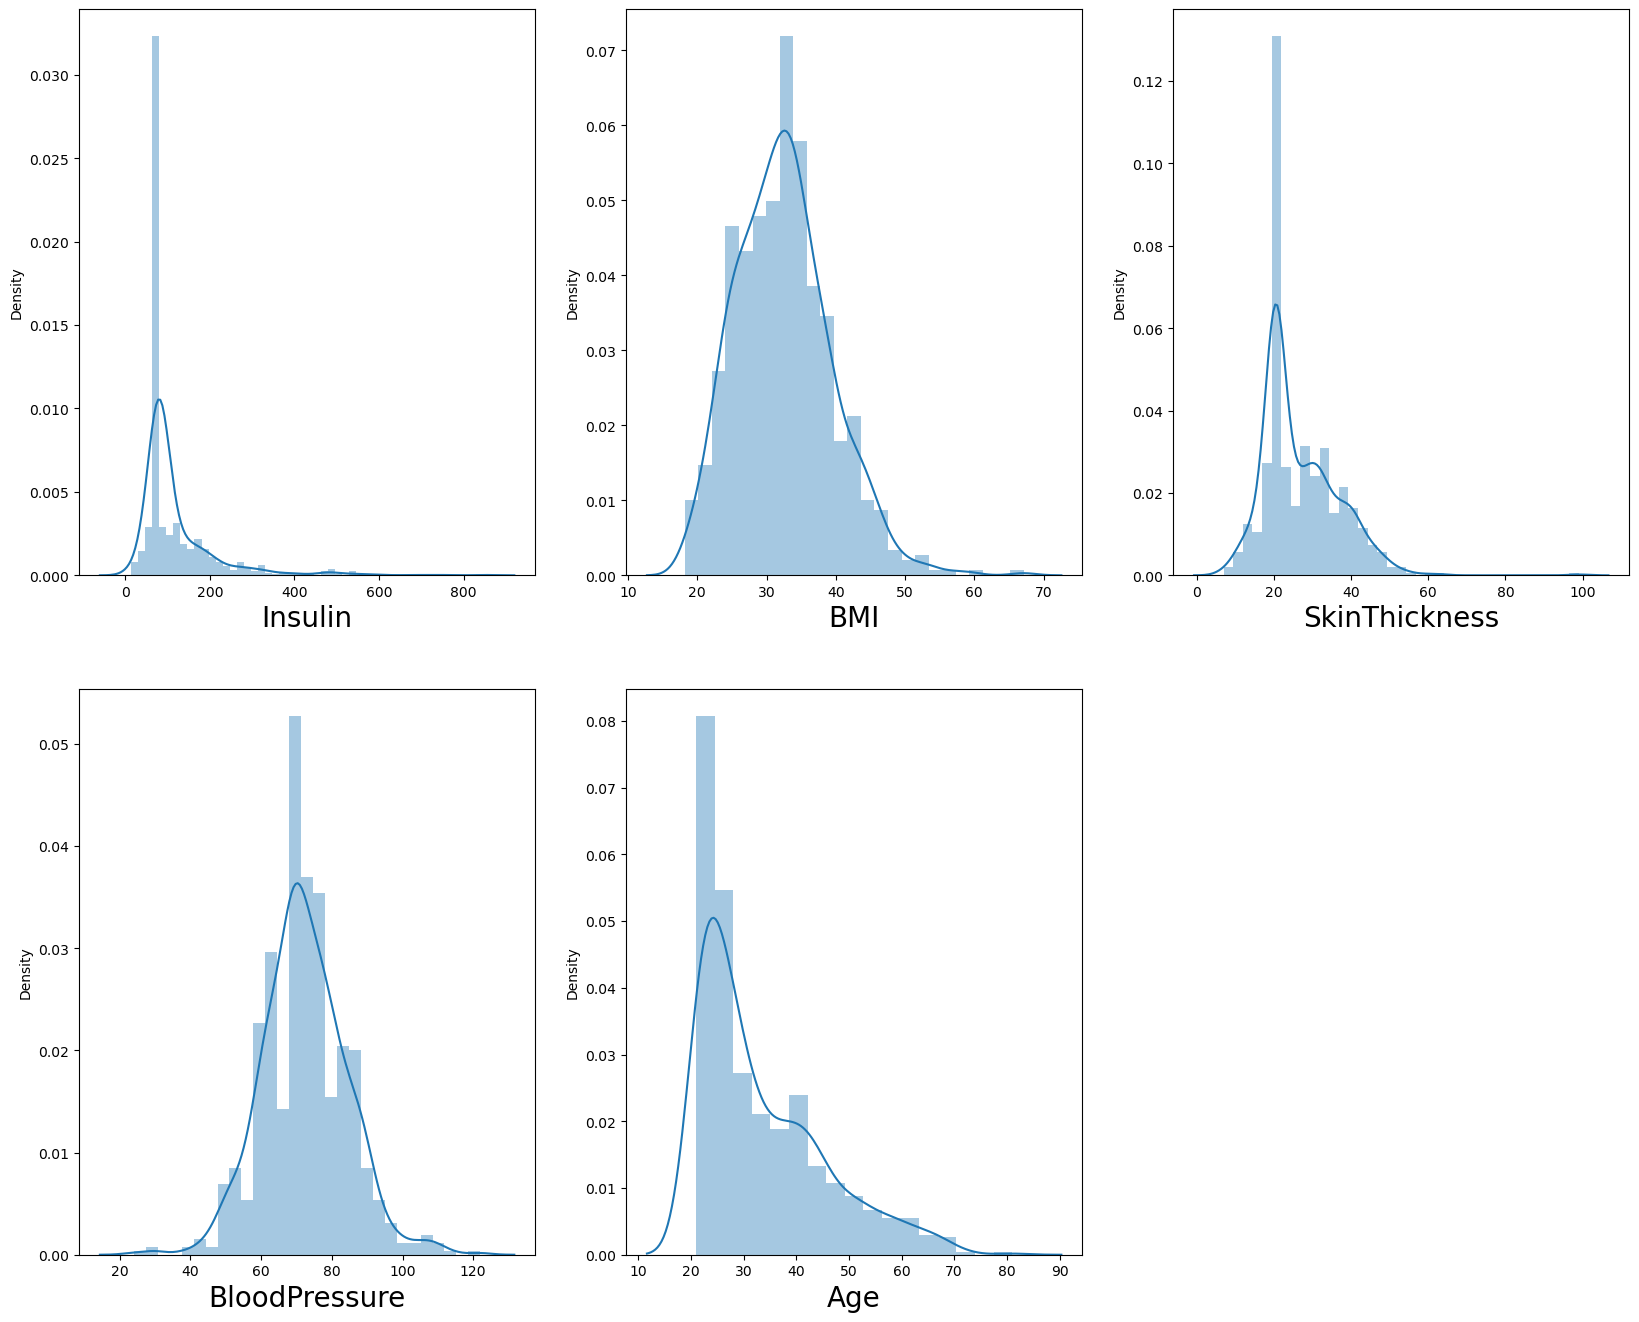

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data[features]:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

# Box-Cox works with only positive values(>0)
yeo-Johnson work with both positive and negative values

In [24]:
from sklearn.preprocessing import PowerTransformer

In [26]:
scaler=PowerTransformer(method='box-cox')
# parameters:
# method='box-cox'or'yeo-johnson'


In [29]:
data[features]=scaler.fit_transform(data[features].values)


ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [30]:
data[features]

,Insulin,BMI,SkinThickness,BloodPressure,Age
0,-0.350666,0.261508,0.956846,-0.009147,1.362797
1,-0.350666,-0.841776,0.415886,-0.507220,0.127990
2,-0.350666,-1.457249,-0.567991,-0.674630,0.231506
3,-0.025195,-0.584749,-0.246245,-0.507220,-1.483064
4,1.006677,1.462877,0.956846,-2.750268,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,1.873163,0.319657,1.764261
764,-0.350666,0.697359,0.211217,-0.174501,-0.366775
765,0.305525,-0.912547,-0.246245,-0.009147,0.017237
766,-0.350666,-0.260838,-0.567991,-1.011681,1.236934


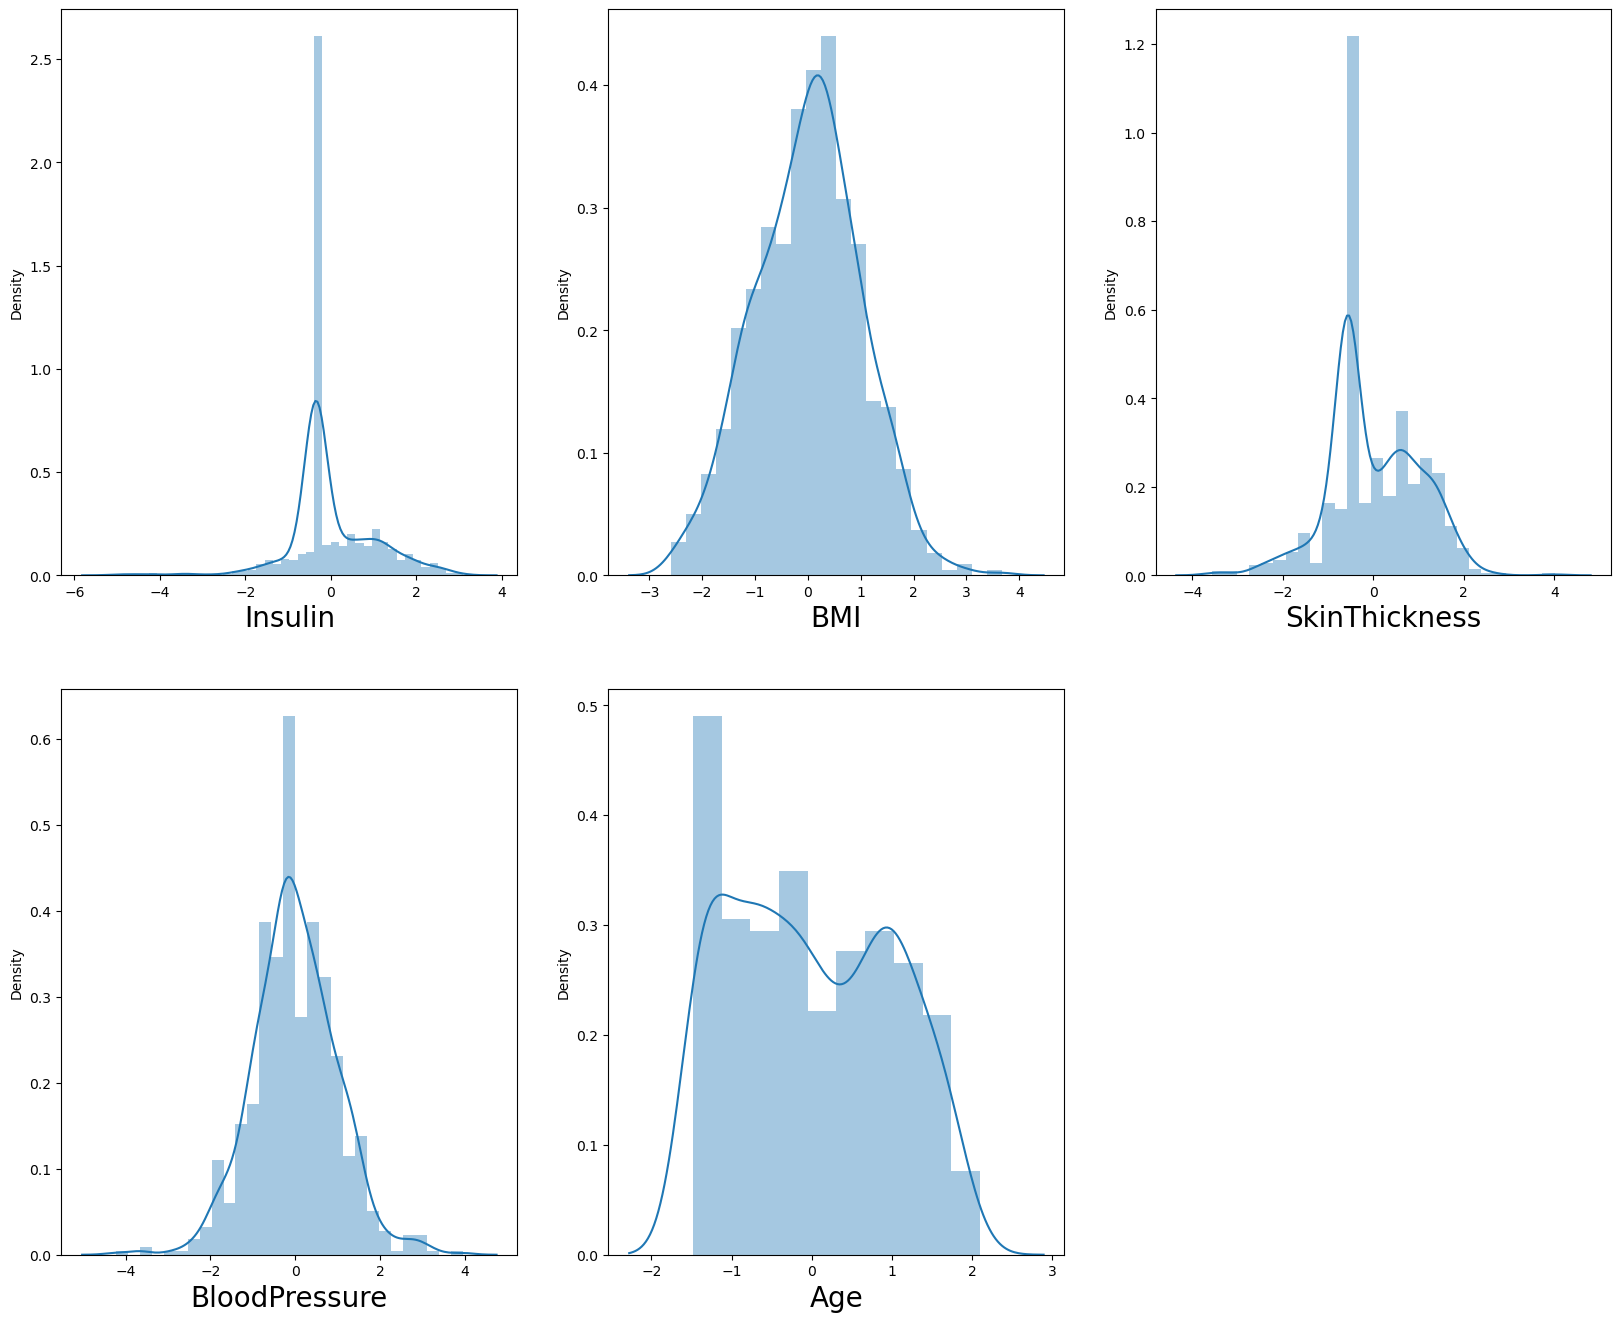

In [31]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data[features]:
    if plotnumber<=9: #there are 9 column
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

# SVM(support vector machine)
supervised ml used for both regression and classification purpose
it will draw a line where it can maintain the maximum distance
    Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

    The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:




# kernal trick 
 IN THE 2-3 D DATA pts are squared and moved up so it maintain the maximum distance

In [33]:
from sklearn.svm import SVC# classification
from sklearn.svm import SVR #regression

# python implementation

In [34]:
from sklearn.decomposition import PCA

In [35]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
df.shape

(569, 32)

In [37]:
df.info

<bound method DataFrame.info of          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           

In [38]:
df=df.drop(['Unnamed: 32'],axis=1)

In [39]:
df.shape

(569, 31)

In [40]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=df.drop('diagnosis',axis=1)
x_scaled=scaler.fit_transform(x)

# Principal Component Analysis(PCA)
    1 it is a dimension reduction technique (not feature selection techni,
    2 it can be applied on features only(not on target)
    3 can be applied when u hv too many feature and their correlation is not that significant with target
    4 it will also takes care of multicollinearity problem

In [43]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

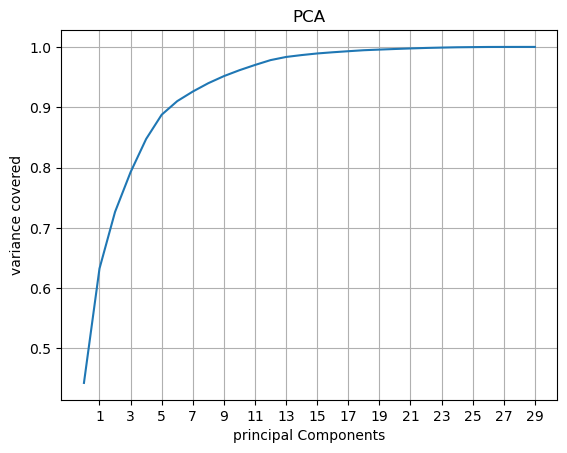

In [45]:
# plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('principal Components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

around 13 principal components are able to explain >95% variance.its safe to consider starting 13pcs

In [47]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157119,-0.877403,0.262955,-0.859012,0.103393
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106996,0.813121,0.157921,-0.943529
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454276,-0.605604,0.124386,-0.410631
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405439,-1.116973,-1.151512,1.011313,-0.933276
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651359,-0.110515,0.387949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062652,0.123341,-0.051727
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222752,-0.192639
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542034,-0.089298,-0.178632,-0.697458,1.225195


In [49]:
#replace label column(diagnosis) into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})
y=df['diagnosis']

In [50]:
#data split into train and test
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=.25,random_state=355)

In [51]:

#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n------------------TRain Result------')
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")   #train prediction score
    elif train==False:
        pred=clf.predict(x_test)
        print('\n-----------Test REsult-------')
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")    #test prediction score
        print("\n--Test classification report   \n",classification_report(y_test,pred,digits=2))  #model confidence accuracy
        


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [58]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [59]:
#call the function and pass dataset to check train and test score
metric_score(svc,x_train,x_test,y_train,y_test,train=True)  #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  #this is for testing score



------------------TRain Result------
accuracy score:98.12%

-----------Test REsult-------
accuracy score:97.90%

--Test classification report   
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={'C':[1,5,10,20],'gamma':[.001,.01,.02,.002]}
gridsearch=GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [65]:
#best parms
gridsearch.best_params_

{'C': 5, 'gamma': 0.01}

In [66]:
#SVC model training and printing train&test score(post gamma update)
svc=SVC(C=5,gamma=.01)
svc.fit(x_train,y_train)

SVC(C=5, gamma=0.01)

In [ ]:
# call the funcn and pass dataset to check train and test score
print_score(svc,x_train,x_test)

# Creating pipeline


In [68]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [72]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
x=df.drop(['Unnamed: 32','diagnosis'],axis=1)
y=df.diagnosis
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=355)

In [77]:
pipe=Pipeline([('scaler',StandardScaler()),#fit_transform
               ('PCA',PCA(n_components=13)),#fit_transform
                ('SVM',SVC(C=7,gamma=.001))])#only fit

In [78]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.972027972027972

# KEYPOINTS
    you need to know the execution sequence
    u cannot use pipeline for plotting graph
    analysis can be done before creating a pipeline
    do not use unnecessary methods in the pipeline

In [ ]:
https://raw.githubusercontent.com/training-ml/Files/main/Mall_Customers.csv

In [80]:
k=0
while True:
    if k%9==0:
        break
    print(k)
    k+=1
    

In [82]:
l=['ab','ba']
list(map(lambda str:str.upper(),l))

['AB', 'BA']

In [84]:
x='WVbf'
for i in range(x):
    print(i)
    

TypeError: 'str' object cannot be interpreted as an integer

In [86]:
a=6
b=5
print(b,a)
a,b=b,a
print(a,b)

5 6
5 6


In [87]:
i=1000
if i>2000:
    tax= 500
else:
    tax=0
print(tax)    

0


In [89]:
import math
print(math.pow(8,3))

512.0
